In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

For data analysis and machine learning, this code imports several libraries and modules. 

Math, numpy, pandas, and matplotlib.pyplot are imported in the first four lines. These libraries provide functions and tools for mathematical calculations, numerical operations, data manipulation, and data visualization, respectively. Tensorflow and Sklearn.metrics are imported next. Machine learning models can be built and trained using TensorFlow, while sklearn.metrics offers functions for evaluating the performance of machine learning models, including the calculation of mean squared errors and mean absolute errors.

The last line imports the warnings module and sets a filter to ignore warning messages. This is done to suppress any warning messages that may be generated during the execution of the code. Overall, this code sets up the necessary dependencies for performing data analysis and machine learning tasks.

In [2]:
AAPL = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_AMZN.csv")

AAPL, TSLA, GOOG, MSFT, and AMZN are read and loaded into separate variables. Every CSV file contains pre-processed data related to different stocks (Apple, Tesla, Google, Microsoft, and Amazon, respectively). The CSV files are read using the PD.read_csv() function. File paths indicate the location of the CSV files on the Google Drive ("/content/drive/MyDrive/Database/Pre_Processed_*.csv"). By using this function, the code reads the contents of each CSV file and stores it in the respective variable. As a result, the variables AAPL, TSLA, GOOG, MSFT, and AMZN will contain the data from their corresponding CSV files. As a result, each company's stock data can be further manipulated, analyzed, or modeled separately.

### Data Processing

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

The code defines a function named `Dataset` that takes two parameters: `Data` and `Date`. The purpose of this function is to preprocess a given dataset and split it into training and testing sets based on a specified date. First, it extracts the 'Adj. Delete the 'Close' column from the `Data` DataFrame for the dates before the specified `Date`. It converts the extracted data into a NumPy array and assigns it to the `Train_Data` variable. Data_Train, Data_Train_X, and Data_Train_Y variables are then initialized. After that, it iterates over the `Train_Data` array in increments of 5, creating subsets of 5 consecutive values. These subsets are appended to the `Data_Train` list.

If the length of the last subset in `Data_Train` is less than 5 (due to incomplete data), it is removed from the list using the `pop()` function.

The next set of operations is similar to the previous steps, but it applies to the testing data. 'Adj.' An array is created using the Close column from the SDataDataFrame, and the result is assigned to the TestData variable. Subsets of five consecutive values are then created and appended to the `Data_Test` list. The last subset is removed if its length is less than 5. Finally, the collected training and testing data are reshaped into a three-dimensional NumPy array of shape (batch_size, sequence_length, input_dimension). The training data arrays are assigned to `Data_Train_X` and `Data_Train_Y`, while the testing data arrays are assigned to `Data_Test_X` and `Data_Test_Y`. These arrays are returned by the function: `Data_Train_X`, `Data_Train_Y`, `Data_Test_X`, and `Data_Test_Y`. The arrays can be used for further analysis or modeling, such as time series analysis or sequence prediction.

The model number is ###

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

Code in this file defines a function named `Model` that constructs and returns a specific type of machine learning model. The model is built using the TensorFlow library and follows a sequential architecture. There are several layers in the model. With 200 units, the first layer is an LSTM (Long Short-Term Memory). The input shape of this layer is (5, 1), indicating that it expects input sequences with a length of 5 and a feature dimension of 1. The activation function used in this layer is a leaky ReLU (Rectified Linear Unit), which introduces a small gradient for negative input values. A 200-unit LSTM layer follows. The leaky ReLU activation function is also used. Unlike the previous layer, this layer does not have the `return_sequences` argument set to True. This means that it only returns the final output of the LSTM layer rather than the full sequence of outputs. The LSTM layer is followed by several dense layers. Each neuron in these layers is connected to every neuron in the previous layer. Different dense layers have different numbers of units: 200, 100, 50, and 5. Each dense layer uses the leaky ReLU activation function. Layers are stacked sequentially, with the output of one layer serving as the input for the next. The model is then returned by the function. By using this function, the specific model configuration can be created and obtained. Based on the data and the specific problem, the returned model can be used for regression, classification, or sequence prediction.

In [5]:
model = Model()

It creates an instance of the machine learning model defined by the `Model` function. The `Model` function constructs and configures the model architecture using TensorFlow, and this line assigns the constructed model to the variable `model`.

By calling the `Model()` function, the code instantiates the model object, which can be further utilized for training, evaluation, and prediction tasks. The model contains the layers and parameters defined in the `Model` function, such as LSTM layers, dense layers, and activation functions.

Once this line of code is executed, the `model` variable holds the constructed model, and it can be employed to train on data, make predictions, evaluate performance, and perform other operations associated with the machine learning model.

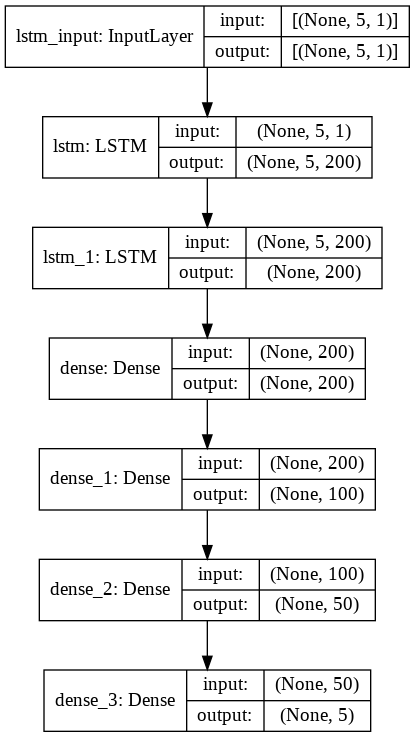

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

Using the TensorFlow Keras library's plot_model function, this code generates a visual representation of the machine learning model. The function takes the `model` object as input and generates a graphical diagram that illustrates the structure of the model. This provides a visual overview of the model layers and their relationships. Layers are represented as blocks, and data flow is indicated by arrows between the blocks. The plot includes details such as the layer types, shapes of inputs and outputs, and the connections between layers. Show_shapes=True displays the input and output tensor shapes. This information can be helpful in understanding the dimensions and flow of data through the model. Using this model plot, it is easier to visualize and comprehend the structure of the machine learning model. As a result of this visual representation, it is easier to understand the model's design, identify any potential issues or improvements, and communicate the model architecture to those involved in the development or review of the model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
__________________________________________________

In this line of code, the architecture and parameters of the machine learning model are summarized. The `summary()` method is a function provided by TensorFlow's Keras library that generates a concise overview of the model.

When executed, this code displays information about each layer in the model, such as the layer type, output shape, number of parameters, and number of trainable parameters. The summary also includes the total number of parameters in the model. This provides a high-level understanding of the model's structure. It helps in assessing the number of layers, the size of the input and output tensors, and the total number of parameters that need to be learned during training. Using this information, model evaluation and debugging can be accomplished. It allows you to quickly check if the model is configured as intended, verify that the input and output shapes match the data requirements, and get insights into the complexity of the model in terms of trainable parameters.

The machine learning model summary provides a comprehensive overview of its structure and characteristics. Further analysis, optimization, and interpretation of the model's performance can be guided by this information.

### Rates for Customized Learning

In [8]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

The code defines a function named "scheduler" that takes an epoch parameter as its input. The purpose of this function is to adjust and return the learning rate (lrate) based on the value of the epoch. This is done by checking the value of the epoch parameter. A fraction of a hundred is used to calculate the learning rate below or equal to 150, with the fraction increasing as the epoch progresses. This means that the learning rate starts small and gradually increases over the initial epochs. A different formula is used if the epoch is greater than 150 but less than or equal to 400. The initial learning rate is set to 10^-5, and the rate exponentially decreases with the epoch value. The decay rate is controlled by the constant `k` and is used to gradually reduce the learning rate over time. When the epoch is greater than 400, the learning rate is fixed at 10^-6. This means that after 400 epochs, the learning rate remains constant at a very low value. The calculated learning rate is returned as the output of the function. With this function, the learning rate is dynamically adjusted during training. In this function, a varying learning rate schedule is defined based on the progress of the training epochs. By adapting the learning rate to the characteristics of the optimization problem, dynamic learning rate schedules can improve the performance and convergence of machine learning models.

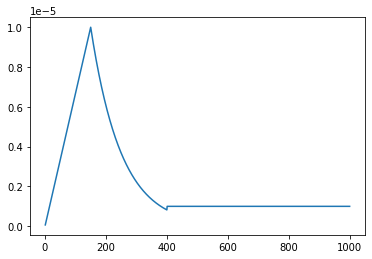

In [9]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

A plot of learning rate values over a range of epochs is generated by this code. 

With a step size of 1, the first line of code creates a list of epochs containing values from 1 to 1000 (inclusive). This list represents the range of epochs for which the learning rate will be calculated. It is created by applying the scheduler function to each value in the `epochs` list. A scheduler function calculates the learning rate based on the value of the epoch. Thus, the `lrate` list contains the corresponding learning rate values for each epoch in the `epochs` list. To create a line plot, the third line of code calls the plt.plot() function from matplotlib.pyplot. The x-axis values are taken from the epochs list and the y-axis values are taken from the lrate list. This generates a line graph that illustrates how the learning rate changes over the range of epochs. The learning rate values are plotted against the corresponding epochs to provide a visual representation of how the learning rate changes. Understanding how the learning rate schedule affects the model's performance and convergence can be helpful. For improved model training, it allows for analysis and fine-tuning of the learning rate strategy.

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

An object named "callback" is created in this line of code that utilizes a learning rate scheduler during the training process. 

Callback objects are constructed using the tf.keras.callbacks.LearningRateScheduler() function. The scheduler function is passed as an argument. The `scheduler` function determines the learning rate based on the epoch number. A callback object is passed to the model's training routine, such as fit(). The callback is responsible for modifying the learning rate of the model at specific intervals, as defined by the `scheduler` function. An epoch-based learning rate scheduler adjusts the learning rate dynamically during training. Adapting the learning rate to the changing requirements of the model as it goes through different stages of optimization can be beneficial for improving the training process. Using the learning rate scheduler callback, the model can adjust its learning rate automatically and without manual intervention. A better model convergence, faster training, and better performance can be achieved as a result.

The apple

In [11]:
AAPL.head()

Date   Open   High    Low  Close  Adj. Close       Volume
0  2015-01-02  27.85  27.86  26.84  27.33       24.86  212818400.0
1  2015-01-05  27.07  27.16  26.35  26.56       24.16  257142000.0
2  2015-01-06  26.64  26.86  26.16  26.57       24.16  263188400.0
3  2015-01-07  26.80  27.05  26.67  26.94       24.50  160423600.0
4  2015-01-08  27.31  28.04  27.17  27.97       25.44  237458000.0

Displays the first few rows of the AAPL DataFrame. The `.head()` function is a method provided by the pandas library that allows us to inspect the top portion of a DataFrame. This code prints the first few columns of the AAPL DataFrame. By default, it displays the first five rows, but this can be customized by passing a specific number as an argument to the `.head()` function. It is used to quickly view the data in the AAPL DataFrame. By inspecting the top rows, we can examine the column names and the values in the dataset, which helps in understanding the structure and content of the data. We can use this information for data exploration, data cleaning, and gaining an initial understanding of the data. In addition to allowing us to verify if the data is loaded correctly, it provides a glimpse into the AAPL DataFrame's format and content.

In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


AAPL DataFrame summary information is provided by this code. This method in the pandas library displays a concise summary of the structure and contents of a DataFrame. The code displays information about the AAPL DataFrame when executed, including the column names, the number of non-null values in each column, and the column types. Additionally, it provides an overall summary that includes the total number of entries (rows) in the DataFrame. This function provides an overview of the dataset's structure and characteristics. It helps in understanding the data types of each column, identifying missing or null values, and estimating the memory usage of the DataFrame. Data exploration, data cleaning, and initial data analysis make use of this information. It allows us to assess the quality and completeness of the data, determine if any data type conversions or missing value handling is necessary, and make informed decisions regarding further data processing or analysis.

By using `.info()`, we gain insights into the basic properties of the AAPL DataFrame, enabling us to proceed with subsequent data manipulations and analysis with a clearer understanding of the data's composition.

In [13]:
# Change Dtype of Date column
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

This code converts the data type of the "Date" column in the AAPL DataFrame to the datetime format using the `pd.to_datetime()` function provided by the pandas library.

The "Date" column in the AAPL DataFrame is converted into a datetime format by executing this code. The datetime format is a standardized representation of dates and times that allows for easier manipulation and analysis of temporal data. This function converts the "Date" column to the datetime format. It ensures that the "Date" column is interpreted as a date, not just a number or text. By changing the data type of the "Date" column to datetime, you can filter or sort the DataFrame according to dates, extract specific components from the dates (year, month, day), calculate time differences, and perform time-based analyses. As a result of this code, the "Date" column in the AAPL DataFrame is recognized as datetime data, enabling The dataset can handle and utilize temporal information seamlessly.

Split the Data into Training and Test set. The Training Period: 2015-01-02 - 2020-09-30 and the Testing Period: 2020-10-01 - 2021-02-26.

In [14]:
AAPL_Date = '2020-10-01'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

This code assigns values to variables and calls the `Dataset` function to split the AAPL dataset into training and testing sets based on a specified date. In the first line, the variable 'AAPL_Date' is assigned the value '2020-10-01'. The second line of code calls the Dataset() function with the AAPL dataset and the `AAPL_Date` as arguments. The `Dataset` function is responsible for performing the actual splitting of the data.  The `Dataset` function takes the AAPL dataset and the `AAPL_Date` as inputs and returns four sets of data: `AAPL_Train_X`, `AAPL_Train_Y`, `AAPL_Test_X`, and `AAPL_Test_Y`.  `AAPL_Train_X` and `AAPL_Train_Y` represent the training data, where `AAPL_Train_X` contains the input features and `AAPL_Train_Y` contains the corresponding output labels or target values.  `AAPL_Test_X` and `AAPL_Test_Y` represent the testing data, where `AAPL_Test_X` contains the input features for testing and `AAPL_Test_Y` contains the corresponding expected output labels or target values for evaluation.  By calling the `Dataset` function and assigning the returned values to specific variables, this code organizes the AAPL dataset into separate training and testing sets, which can be further used for training a machine learning model, evaluating its performance, or conducting any other analysis related to the dataset.

### Fitting the model

In [15]:
AAPL_Model = Model()

For the AAPL dataset, this code creates a machine learning model instance. 

This line of code initializes the variable AAPL_Model and assigns its value to the Model() function. The `Model()` function is responsible for constructing and configuring the specific machine learning model architecture.

By calling the `Model()` function, the code instantiates the `AAPL_Model` object, which represents the machine learning model tailored for the AAPL dataset.

The `AAPL_Model` object encapsulates the architecture, parameters, and functionality defined within the `Model()` function. It can be utilized to perform various tasks, such as training the model on the AAPL training data, making predictions, evaluating the model's performance, or conducting any other operations associated with the machine learning model.

Overall, this code sets up the `AAPL_Model` object as an instance of the machine learning model specific to the AAPL dataset, enabling further utilization of the model for analysis, prediction, and other tasks related to the AAPL stock data.

In [16]:
AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the compilation settings for the `AAPL_Model` machine learning model. This code is provided by the TensorFlow Keras library's compile() function. It takes several arguments to define the optimizer, loss function, and metrics to be used during the training process. The optimizer argument is set to Adam in this example. The optimizer determines how the model's weights are updated during training, and Adam is a popular optimization algorithm widely used in deep learning. A mse loss argument is used. It is clear from this that the mean square error is the loss function used to calculate the difference between the predicted and real outputs.

The `metrics` argument is set to `tf.keras.metrics.RootMeanSquaredError()`, which initializes the root mean squared error (RMSE) as the evaluation metric. The RMSE metric provides a measure of how well the model performs in terms of the average difference between the predicted and true outputs.

By configuring these settings through the `compile()` function, the code prepares the `AAPL_Model` for the training process, specifying the optimization algorithm, loss function, and evaluation metric to be used. In order to train the model effectively and assess its performance accurately, these settings are crucial.

In [ ]:
AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

This code trains the `AAPL_Model` machine learning model using the training data (`AAPL_Train_X` and `AAPL_Train_Y`) and evaluates its performance on the testing data (`AAPL_Test_X` and `AAPL_Test_Y`).

The `fit()` method is a function provided by the TensorFlow Keras library that performs the training process for a machine learning model. It takes several arguments to specify the training data, the number of training epochs, the validation data for evaluation, and any additional callbacks to be utilized during training.

In this specific code, `AAPL_Train_X` and `AAPL_Train_Y` are passed as the training data, representing the input features and the corresponding output labels, respectively.

The `epochs` argument is set to 1000, indicating the number of times the training data will be iterated over during the training process. Each epoch represents a complete pass through the entire training dataset. In this case, validation data is set to (AAPL_Test_X, AAPL_Test_Y), providing the testing data as a validation set. This allows for monitoring the model's performance on unseen data and helps in assessing its generalization ability. The callbacks argument refers to a callback object (such as a learning rate scheduler). Callbacks provide additional functionalities during training, such as modifying the learning rate or saving the model's checkpoints. AAPL_Model is trained using the specified training data and settings by running the code above. The model's performance is evaluated on the testing data after each epoch, and the training history is stored in the `AAPL_hist` object, which can be used to analyze the model's training progress and performance metrics.

Overall, this code initiates and manages the training process for the `AAPL_Model`, allowing it to learn from the training data and improve its performance over the specified number of epochs.

In [18]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

A training history is obtained after the training process has been completed by this code. It captures the values of different metrics recorded during training and organizes them into separate variables for further analysis and visualization. In the first line of code, the history of the AAPL model is stored in the history_dict variable. The `history` attribute of the `AAPL_hist` object contains various recorded metrics such as loss, root mean squared error (RMSE), validation loss, and validation RMSE.  The subsequent lines of code extract the individual metric values from the `history_dict` and assign them to separate variables for ease of use.  - The `loss` variable stores the values of the loss metric recorded during the training epochs. - The `root_mean_squared_error` variable stores the values of the RMSE metric recorded during the training epochs. - The `val_loss` variable stores the values of the validation loss metric recorded during the training epochs. - The `val_root_mean_squared_error` variable stores the values of the validation RMSE metric recorded during the training epochs.  Finally, the `epochs` variable is assigned to a range of values from 1 to the length of the `loss` variable plus one. When visualizing the training history, this range represents the number of epochs. As a result of capturing and organizing the model's training history metrics into separate variables, this code enables further analysis, plotting, or interpretation of the model's performance during training. In addition to providing insights into the model's convergence and improvement over time, these metrics also provide information about its generalization ability.

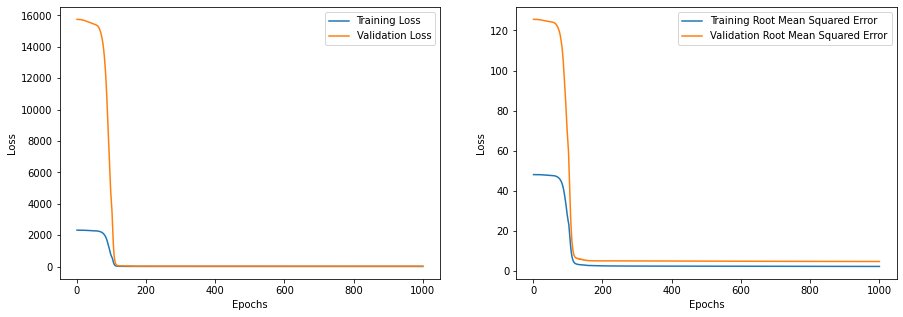

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code generates a visualization that displays the training history of the `AAPL_Model` in the form of two line plots side by side.  The first line of code creates a figure (`fig`) with two subplots (`ax1` and `ax2`) arranged horizontally (side by side) using the `plt.subplots()` function from the matplotlib.pyplot library.  The following two lines of code adjust the size of the figure, setting its height to 5 units and width to 15 units using the `set_figheight()` and `set_figwidth()` Afterwards, the code plots the training history metrics on the subplots. Ax1 plots the training loss (loss) and validation loss (val_loss) as functions of epochs (epochs). In this plot, the x-axis is labeled "Epochs" and the y-axis is labeled "Loss". It is now possible to distinguish between training loss and validation loss using a legend.

Similarly, for `ax2`, the code plots the training root mean squared error (`root_mean_squared_error`) and the validation root mean squared error (`val_root_mean_squared_error`) as functions of the number of epochs (`epochs`). Accordingly, the x-axis is labeled "Epochs" and the y-axis is labeled "Root Mean Squared Error". A legend is added to differentiate between the training RMSE and validation RMSE.

Finally, the `plt.show()` function is called to display the generated plot.

By executing this code, two line plots are generated side by side, presenting the training history of the `AAPL_Model` in terms of loss and RMSE metrics. As a result of this visualization, it is possible to assess and interpret the training behavior and convergence of the model over the various training epochs.

Predicting Apple's closing stock price

In [20]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

This code makes predictions using the `AAPL_Model` machine learning model on the testing data (`AAPL_Test_X`). A trained model can be predicted using the TensorFlow Keras library's predict() function. In this specific code, the `AAPL_Test_X` data is passed as an argument to the `predict()` function. When this code is run, it generates predictions for the input features in `AAPL_Test_X`. This variable is used to assign the predicted values generated by the model to the corresponding input samples in the testing data. These predictions represent the model's estimated outputs or target values for the corresponding input samples in the testing data. Using these predictions, one can evaluate the model's performance on testing data, compare it with the true target values, or predict new data that will not be available until later. This code allows the evaluation and analysis of the model's performance and generalization ability to unseen data by making predictions based on its trained model on testing data. In the context of the AAPL dataset, it facilitates further analysis or decision-making based on the model's predictions.

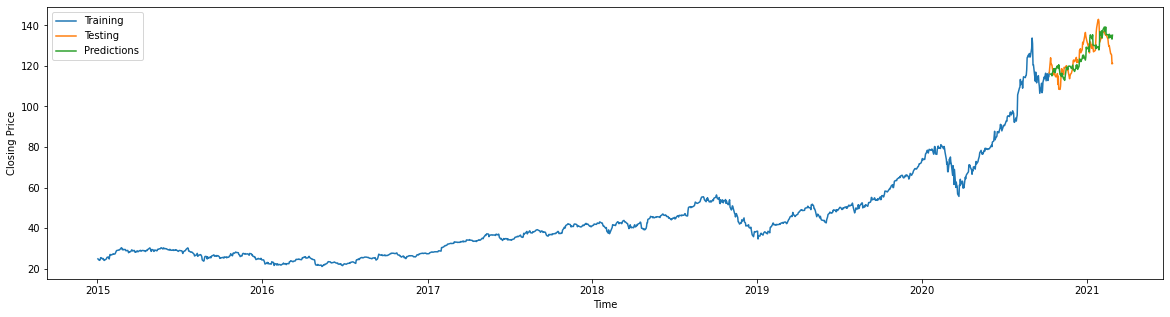

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(AAPL['Date'][AAPL['Date'] < '2020-10-12'], AAPL['Adj. Close'][AAPL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-09'], AAPL['Adj. Close'][AAPL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(AAPL['Date'][AAPL['Date'] >= '2020-10-12'], AAPL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

To visualize the closing prices of AAPL stock, as well as the training data, testing data, and predictions made by the model, this code generates a line plot.

The first line of code sets the figure size of the plot to 20 units in width and 5 units in height using the `plt.figure(figsize=(20, 5))` function from the matplotlib.pyplot library.

The next three lines of code create the line plots. The first plot represents the training data, where the x-axis values are the dates (`AAPL['Date'][AAPL['Date'] < '2020-10-12']`) and the y-axis values are the corresponding adjusted closing prices (`AAPL['Adj. The close date is [AAPL['Date'] < '2020-10-12']`). This plot represents the testing data, where the x-axis values are the dates (`AAPL['Date'][AAPL['Date'] >= '2020-10-09']`) and the y-axis values are the corresponding adjusted closing prices (`AAPL['Adj. (AAPL['Date'] >= '2020-10-09')). The third plot represents the predictions made by the model, where the x-axis values are the dates (`AAPL['Date'][AAPL['Date'] >= '2020-10-12']`) and the y-axis values are the predicted closing prices (`AAPL_prediction.reshape(-1)`).  The following lines of code set the x-axis label to "Time" and the y-axis label to "Closing Price" using the `plt.xlabel()` and `plt.ylabel()` functions, respectively.  The `plt.legend(loc='best')` line adds a legend to the plot, which identifies the lines in the The story. The `loc='best'` argument automatically determines the best position for the legend based on the available space in the plot.

It generates a line plot showing the closing prices of Apple's stock over time, along with the model predictions and training data. The visualization helps in understanding how the model performs in relation to the actual closing prices and provides a visual representation of its accuracy.

In [22]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.822911467470171
MAPE: 0.030390689646776783


To assess the model's performance on AAPL testing data, this code computes and prints two evaluation metrics, RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error).

The first line of code calculates the RMSE using the `mean_squared_error()` function from the sklearn.metrics module. The mean squared error is calculated by comparing the predicted values with the true values (AAPL_Test_Y.reshape(-1, 5)). The `math.sqrt()` function is then used to take the square root of the mean squared error, giving us the RMSE value. Numpy's mean and average functions are then used to calculate the MAPE. It calculates the absolute percentage error for each prediction by taking the absolute difference between the predicted values and the true values, dividing it by the absolute true values, and then averaging these values using `np.mean()`.

The `print()` function is used to display the calculated values of RMSE and MAPE. The `f-string` notation (`f'RMSE: {rmse}'` and `f'MAPE: {mape}'`) is used to format the output and insert the calculated metric values into the printed string.

By executing this code, the RMSE and MAPE values are calculated and displayed, providing quantitative measures of the model's accuracy and performance on the AAPL testing data. RMSE is the average difference between predicted and true values, while MAPE is the average percentage error. Regression models are commonly evaluated using these metrics to determine their quality and reliability.

Elon Musk

In [23]:
TSLA.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  44.57  44.65  42.65  43.86       43.86  23822000.0
1  2015-01-05  42.91  43.30  41.43  42.02       42.02  26842500.0
2  2015-01-06  42.01  42.84  40.84  42.26       42.26  31309500.0
3  2015-01-07  42.67  42.96  41.96  42.19       42.19  14842000.0
4  2015-01-08  42.56  42.76  42.00  42.12       42.12  17212500.0

The first few rows of the TSLA DataFrame are displayed in this code. The `.head()` function is a method provided by the pandas library that allows us to inspect the top portion of a DataFrame. Upon execution, this code displays the first few rows of the TSLA DataFrame. By default, it displays the first five rows, but this can be customized by passing a specific number as an argument to the `.head()` function. It is used to quickly get an overview of TSLA DataFrame data. By inspecting the top rows, we can examine the column names and the values in the dataset, which helps in understanding the structure and content of the data. We can use this information to explore and clean the data. It provides a glimpse into the TSLA DataFrame's format and content and allows us to verify if the data has been loaded correctly.

In [24]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


TSLA DataFrame summary information is provided by this code. The `.info()` function is provided by the pandas library that displays a concise summary of the DataFrame's structure and contents. This code gives information about TSLA DataFrames, including column names, the number of non-null values in each column, and its data type, when executed. Furthermore, it provides an overall summary that includes the total number of entries (rows) in the DataFrame. This function provides an overview of the dataset's structure and characteristics. It helps in understanding the data types of each column, identifying missing or null values, and estimating the memory usage of the DataFrame. Using this information is useful for data exploration, data cleaning, and initial data analysis. The data will be evaluated for quality and completeness, converted into a data type or handled with missing values, and we can make informed decisions about how to proceed with data processing or analysis.

By using `.info()`, we gain insights into the basic properties of the TSLA DataFrame, enabling us to proceed with subsequent data manipulations and analysis with a clearer understanding of the data's composition.

In [25]:
# Change Dtype of Date column
TSLA["Date"] = pd.to_datetime(TSLA["Date"])

This code changes the data type of the "Date" column in the TSLA DataFrame to the datetime format using the `pd.to_datetime()` function provided by the pandas library.

As a result of executing this code, the TSLA DataFrame's "Date" column is converted from its original data type (presumably a string or another format) to datetime format. The datetime format is a standardized representation of dates and times that allows for easier manipulation and analysis of temporal data. To convert the "Date" column to this format, use the function pd.to_datetime(). By doing so, the "Date" column will be interpreted as dates instead of mere numbers or text. It is possible to filter or sort the DataFrame based on dates, extract specific components (year, month, day), calculate time differences, and perform time-based analysis by changing the data type of the "Date" column to datetime. Basically, this code ensures that the "Date" column in the TSLA DataFrame is recognized as datetime data, enabling Datasets with seamless handling and utilization of temporal information.

Split the Data into Training and Test set. Training Period: 2015-01-02 - 2020-09-30 and Testing Period: 2020-10-01 - 2021-12-26

In [26]:
TSLA_Date = '2020-10-01'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA, TSLA_Date)

This code prepares the TSLA dataset for training and testing by splitting it into four sets of data: TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, and TSLA_Test_Y. It starts off by assigning the value 2020-10-01 to the variable `TSLA_Date`. This represents the date that will be used as a reference point for splitting the data. The second line calls the Dataset function with TSLA dataset and TSLA_Date. The `Dataset` function is responsible for performing the actual splitting of the data.  The `Dataset` function takes the TSLA dataset and the `TSLA_Date` as inputs and returns four sets of data: `TSLA_Train_X`, `TSLA_Train_Y`, `TSLA_Test_X`, and `TSLA_Test_Y`.  `TSLA_Train_X` and `TSLA_Train_Y` represent the training data, where `TSLA_Train_X` contains the input features and `TSLA_Train_Y` contains the corresponding output labels or target values.  `TSLA_Test_X` and `TSLA_Test_Y` represent the testing data, where `TSLA_Test_X` contains the input features for testing and `TSLA_Test_Y` contains the corresponding expected output labels or target values for evaluation.  By calling the `Dataset` function and assigning the returned values to specific variables, this code organizes the TSLA dataset into separate training and testing sets, which can be further used for training a machine learning model, evaluating its performance, or conducting any other analysis related to the dataset.

Fitting of the model

In [27]:
TSLA_Model = Model()

The code creates an instance of a machine learning model specifically designed for the TSLA dataset. This code initializes a variable named `TSLA_Model` and assigns it the value returned by the `Model()` function. The `Model()` function is responsible for constructing and configuring the specific machine learning model architecture.

By calling the `Model()` function, the code instantiates the `TSLA_Model` object, which represents the machine learning model tailored for the TSLA dataset.

The `TSLA_Model` object encapsulates the architecture, parameters, and functionality defined within the `Model()` function. In addition to training the model on TSLA training data, it can also be used to make predictions, evaluate its performance, or perform other machine learning operations. A machine learning model that is specific to the TSLA dataset is created in this code, which allows the model to be used for analysis, prediction, and other tasks related to TSLA stock data.

In [28]:
TSLA_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the compilation settings for the `TSLA_Model` machine learning model. This code uses the TensorFlow Keras library's compile() function to specify various training settings. It takes several arguments to define the optimizer, loss function, and metrics to be used during the training process. For example, the optimizer argument is set to Adam(), which initializes the Adam optimizer. The optimizer determines how the model's weights are updated during training, and Adam is a popular optimization algorithm widely used in deep learning. MSE stands for mean square error. This indicates that the mean squared error is used as the loss function to measure the discrepancy between the predicted outputs and the true outputs during training.

The `metrics` argument is set to `tf.keras.metrics.RootMeanSquaredError()`, which initializes the root mean squared error (RMSE) as the evaluation metric. The RMSE metric provides a measure of how well the model performs in terms of the average difference between the predicted and true outputs.

By configuring these settings through the `compile()` function, the code prepares the `TSLA_Model` for the training process, specifying the optimization algorithm, loss function, and evaluation metric to be used. In order to train the model effectively and assess its performance accurately, these settings are crucial.

In [ ]:
TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

This code trains the `TSLA_Model` machine learning model using the training data (`TSLA_Train_X` and `TSLA_Train_Y`) and evaluates its performance on the testing data (`TSLA_Test_X` and `TSLA_Test_Y`).

The `fit()` method is a function provided by the TensorFlow Keras library that performs the training process for a machine learning model. It takes several arguments to specify the training data, the number of training epochs, the validation data for evaluation, and any additional callbacks to be utilized during training.

In this specific code, `TSLA_Train_X` and `TSLA_Train_Y` are passed as the training data, representing the input features and the corresponding output labels, respectively.

The `epochs` argument is set to 200, indicating the number of times the training data will be iterated over during the training process. Each epoch represents a complete pass through the entire training dataset. For training purposes, the validation data is set to (TSLA_Test_X, TSLA_Test_Y). This allows for monitoring the model's performance on unseen data and helps in assessing its generalization ability. It is set to a callback object (such as a learning rate scheduler). Callbacks provide additional functionalities during training, such as modifying the learning rate or saving the model's checkpoints. This code trains the TSLA_Model with the specified training data. The model's performance is evaluated on the testing data after each epoch, and the training history is stored in the `TSLA_hist` object, which can be used to analyze the model's training progress and performance metrics.

Overall, this code initiates and manages the training process for the `TSLA_Model`, allowing it to learn from the training data and improve its performance over the specified number of epochs.

In [30]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts the training history of the `TSLA_Model` after the training process is completed. It captures the values of different metrics recorded during training and organizes them into separate variables for further analysis and visualization. The first line of code assigns the history_dict variable to the TSLA_Model. The `history` attribute of the `TSLA_hist` object contains various recorded metrics such as loss, root mean squared error (RMSE), validation loss, and validation RMSE.  The subsequent lines of code extract the individual metric values from the `history_dict` and assign them to separate variables for ease of use.  - The `loss` variable stores the values of the loss metric recorded during the training epochs. - The `root_mean_squared_error` variable stores the values of the RMSE metric recorded during the training epochs. - The `val_loss` variable stores the values of the validation loss metric recorded during the training epochs. - The `val_root_mean_squared_error` variable stores the values of the validation RMSE metric recorded during the training epochs.  Finally, the `epochs` variable is assigned to a range of values from 1 to the length of the `loss` variable plus one. When visualizing the training history, this range will be used as the x-axis value.

By capturing and organizing the training history metrics in separate variables, this code enables further analysis, plotting, or interpretation of the model's performance throughout the training process. A model's convergence, improvement, and generalization ability over epochs can be determined by these metrics.

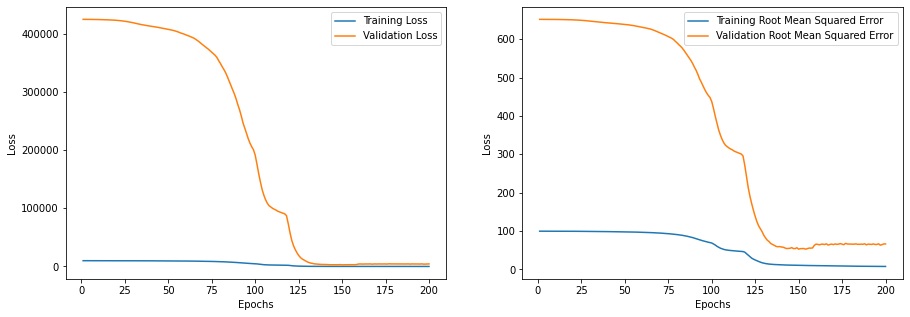

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code generates a figure with two subplots and plots the training history metrics of the `TSLA_Model` on each subplot using the matplotlib.pyplot library. It begins by defining two subplots (ax1 and ax2) and arranging them side by side. The number of rows and columns in the subplot grid is specified as 1 row and 2 columns, respectively. The following two lines of code adjust the figure's size. The `set_figheight()` function sets the height of the figure to 5 units, and the `set_figwidth()` function sets the width of the figure to 15 units. The training history metrics are then plotted on each subplot. In the case of `ax1`, two line plots are created. There are two plots: one represents the training loss (loss) as a function of the number of epochs (epochs), the other represents the validation loss (val_loss). The plots are labeled accordingly, with the x-axis labeled as "Epochs" and the y-axis labeled as "Loss". A legend is added to distinguish between the training loss and validation loss. For `ax2`, two line plots are created. Plots 1, 2, and 3 represent the training root mean square error (RMSE) as a function of epochs, and plots 4, 5, and 6 represent the validation RMSE. "Epochs" is the x-axis, and "Loss" is the y-axis. A legend is added to differentiate between the training RMSE and validation RMSE.

Finally, the `plt.show()` function is called to display the generated plot.

By executing this code, a figure with two subplots is generated, each containing line plots of the training history metrics of the `TSLA_Model`. In this visualization, the training progress and performance of the model are clearly depicted, allowing easy comparison and interpretation of the loss and RMSE metrics over time.

Predicting Tesla's closing stock price

In [32]:
TSLA_prediction = TSLA_Model.predict(TSLA_Test_X)

This code uses the trained `TSLA_Model` to make predictions on the testing data (`TSLA_Test_X`). TensorFlow Keras provides the predict function that allows for making predictions, based on a trained model. In this specific code, the `TSLA_Test_X` data is passed as an argument to the `predict()` function. It is this code that generates predictions for the input features provided in the `TSLA_Test_X`. These predictions represent the model's estimated outputs or target values for the corresponding input samples in the testing data. These values are assigned to the TSLA_prediction variable. These predictions can be used for various purposes, such as evaluating the model's performance on the testing data, comparing them with the true target values (`TSLA_Test_Y`), or making predictions for new, unseen data.

This code allows the model to perform and analyze its performance and ability to generalize to unseen data by evaluating and analyzing the model's performance on the testing data. Based on the TSLA dataset, it facilitates further analysis or decision-making.

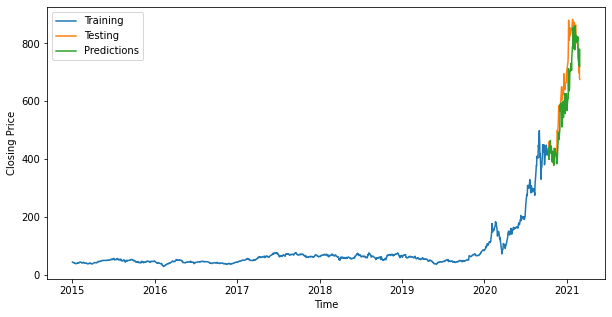

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'][TSLA['Date'] < '2020-10-12'], TSLA['Adj. Close'][TSLA['Date'] < '2020-10-12'], label = 'Training')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-09'], TSLA['Adj. Close'][TSLA['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(TSLA['Date'][TSLA['Date'] >= '2020-10-12'], TSLA_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

The code creates a plot that visualizes historical stock price data for TSLA, training data, testing data, and model predictions. The first line of code sets the figure size to (10, 5), indicating the width and height of the plot in inches.

The subsequent lines of code create the line plots. Three separate lines are plotted on the same figure: The first line plot shows the historical stock prices of TSLA during the training period. The TSLA DataFrame's 'Date' column is used to filter corresponding dates before '2020-10-12'. 'Adj.' The closing prices are plotted using the 'Close' column. This line is labeled as 'Training'. The second line represents the historical stock prices of TSLA during the testing period. TSLA DataFrame's 'Date' column is used to filter dates on or after '2020-10-09'. 'Adj.' The closing prices are plotted using the 'Close' column. This line is labeled as 'Testing'. The third line represents the model's predictions for the testing period. TSLA DataFrame's 'Date' column is used to filter the corresponding dates on or after '2020-10-12'. TSLA_prediction, which contains predicted closing prices, is plotted against these dates. This line is labeled as 'Predictions'.

Additional code lines set the x-axis label to 'Time', the y-axis label to 'Closing Price', and add a legend to identify the different lines on the plot.

The model's predictions along with the historical stock prices of Tesla are displayed in this plot generated by executing this code. The visualization shows the actual stock prices, the model's performance in predicting prices, and the training and testing periods. By comparing the observed prices and the model's predictions, we are able to assess the model's accuracy and effectiveness in capturing the underlying patterns in the TSLA stock data.

In [34]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Test_Y.reshape(-1, 5))/np.abs(TSLA_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 66.40686299614501
MAPE: 0.07223948908878701


A model's performance compared to true values can be evaluated by calculating and printing the root mean squared error (RMSE) and the mean absolute percent error (MAPE).

The first line of code calculates the RMSE between the true target values (`TSLA_Test_Y`) and the model's predictions (`TSLA_prediction`). To calculate the mean squared error between two sets of values, we use the scikit-learn function mean_squared_error(). The `math.sqrt()` function is then applied to take the square root of the mean squared error, resulting in the RMSE. The second line calculates the MAPE between the true target values and the model predictions. The `np.abs()` function computes the absolute difference between the predicted value and the true value, and the result is divided by the true value. These values are then averaged using the `np.mean()` function to obtain the MAPE. The third line prints the calculated RMSE. The value of `rmse` is displayed in place of `{rmse}`. Line four prints the calculated MAPE. The value of `mape` is displayed in place of `{mape}`. The RMSE and MAPE metrics are computed and displayed, providing quantitative measures of the model's accuracy and percentage error. In addition to capturing the patterns and trends in the TSLA stock data, these metrics serve as indicators of how well the model aligns with the true values.

Search engine

In [35]:
GOOG.head()

Date    Open    High     Low   Close  Adj. Close     Volume
0  2015-01-02  527.56  529.82  522.67  523.37      523.37  1447563.0
1  2015-01-05  521.83  522.89  511.66  512.46      512.46  2059840.0
2  2015-01-06  513.59  514.76  499.68  500.59      500.59  2899940.0
3  2015-01-07  505.61  505.86  498.28  499.73      499.73  2065054.0
4  2015-01-08  496.63  502.10  489.66  501.30      501.30  3353582.0

This code retrieves the first few rows of data from the GOOG DataFrame. Pandas' head() function allows viewing the top rows of a DataFrame. By calling `GOOG.head()`, the code retrieves the first few rows of the GOOG DataFrame, displaying them in the output. This is used to quickly see the GOOG DataFrame's structure and content. This summary provides a concise summary of the data, including column names and initial rows, which can be useful for understanding the data and performing initial explorations. With this code, you will see the first few rows of the GOOG DataFrame, giving you an overview of the data and allowing you to get a feel for its format and values.

In [36]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


This code provides detailed information about the structure and content of the GOOG DataFrame. An overview of the dataframe's metadata is provided by the info() function in the pandas library. By calling `GOOG.info()`, the code prints out several pieces of information about the GOOG DataFrame. These include the number of columns and rows, the type of each column, and the memory usage. It also provides information about any missing values in the DataFrame and the count of non-null values for each column. This information gives a better understanding of the GOOG DataFrame. For data cleaning, preprocessing, and further analysis, it can be crucial to identify data types, missing values, and memory usage. By executing this code, the output will provide a detailed overview of the GOOG DataFrame, providing information on its size, column type, memory usage, and missing values. By utilizing this information, data exploration and manipulation tasks can be performed effectively, assisting in understanding and utilizing the dataset.

In [37]:
# Change Dtype of Date column
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

This code converts the data type of the "Date" column in the GOOG DataFrame to a datetime format. The first line accesses the "Date" column using "GOOG["Date"]". It then assigns the result of the conversion to the same column, overwriting the existing data. This function converts a column to a datetime format using the pandas library. It parses the values in the column and converts them into datetime objects. When executed, the "Date" column in the GOOG DataFrame becomes a datetime object. With this conversion, dates can be handled and manipulated more efficiently, making various time-based analyses and operations possible.

Split the Data into Training and Test set. The Training Period: 2015-01-02 - 2020-10-30 The Testing Period:  2020-11-02 - 2021-02-26

In [38]:
GOOG_Date = '2020-11-01'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG, GOOG_Date)

This code prepares the training and testing datasets for the GOOG stock data based on a specified date. It assigns the value '2020-11-01' to the variable GOOG_Date. This represents the date that will be used to split the data into training and testing sets. It is called with two arguments: `GOOG` and `GOOG_Date`. The `Dataset()` function is a custom function that takes a dataset and a specific date as input. When this code is run, the GOOG dataset and the specified date are passed as arguments. The function processes the data and splits it into four sets: `GOOG_Train_X`, `GOOG_Train_Y`, `GOOG_Test_X`, and `GOOG_Test_Y`.  - `GOOG_Train_X` represents the input features of the training dataset, which will be used to train the model. - `GOOG_Train_Y` represents the corresponding output labels or target values of the training dataset. - `GOOG_Test_X` represents the input features of the testing dataset, which will be used to evaluate the trained model. - `GOOG_Test_Y` represents the This code creates separate training and testing datasets based on the specified date. It splits the GOOG stock data based on the specified date. As a result, the model can be trained on historical data and assessed on unseen data from a specific point in time.

### Fitting of the model

In [39]:
GOOG_Model = Model()

This code creates an instance of a machine learning model called `GOOG_Model` specifically designed for the GOOG stock data. This function returns a predefined machine learning model architecture. The architecture of the model is specified within the `Model()` function and typically includes various layers, such as LSTM (Long Short-Term Memory) layers and dense layers, to capture patterns and relationships in the data.

By executing this code, the `GOOG_Model` object is instantiated, representing the machine learning model that will be used to learn patterns and make predictions on the GOOG stock data. The model instance can be trained, evaluated, and used to make future predictions, based on the parameters and architecture specified within the `Model()` function.

In [40]:
GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

This code configures the compilation of the `GOOG_Model` by specifying the optimizer, loss function, and evaluation metric. TensorFlow Keras provides the compile() function. In this code, it is called on the `GOOG_Model` object. Its first argument, optimizer, sets the optimizer that adjusts the model's parameters during training. In this case, the Adam optimizer is chosen, which is a popular optimization algorithm commonly used in deep learning models. The second argument, loss, specifies a loss function that measures the discrepancy between the predicted and true values. It uses the mean squared error (MSE) loss function, which calculates the average squared difference between the predicted and true values. It uses metrics to evaluate the model's performance. The root mean squared error (RMSE) is used as the metric in this code. RMSE provides a measure of the average prediction error, similar to the MSE but in the original scale of the data. It compiles the Google model using the specified optimizer, loss function, and evaluation metric. In this configuration, the model is prepared for training by specifying how its parameters should be optimized, the loss calculated, and the performance tracked.

In [ ]:
GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])

This code trains the `GOOG_Model` using the training datasets `GOOG_Train_X` and `GOOG_Train_Y`, and validates its performance using the testing datasets `GOOG_Test_X` and `GOOG_Test_Y`.

The `fit()` function is a method provided by the TensorFlow Keras library. It is called on the `GOOG_Model` object to train the model. GOOG_Train_X and GOOG_Train_Y are the input features and target values for the training dataset, respectively. These datasets are used to train the model by iteratively adjusting its parameters based on the provided inputs and desired outputs. When training the model, the epochs parameter specifies how many times the model will iterate over the entire training dataset. In this code, the model is trained for 1000 epochs, meaning it will go through the training data 1000 times. As indicated in the validation_data parameter, the validation dataset is (GOOG_Test_X, GOOG_Test_Y). For monitoring the model's progress and to identify potential overfitting or underfitting, the model's loss and metrics will be computed after each epoch on this validation dataset.

The `callbacks` parameter is set to `[callback]`, which allows for the inclusion of callback functions during the training process. At specific points during training, callbacks can perform additional actions. In this code, the `callback` function (previously defined) is included as a callback, potentially for adjusting the learning rate during training. Upon execution, the `GOOG_Model` is trained on the training dataset for the specified number of epochs. In order to minimize the loss and improve the model's performance, the parameters are updated iteratively. Validation datasets are used to evaluate the model's performance and provide feedback on its generalization capability. This object records the history of the training process, including the loss and metrics values at each epoch, which can be analyzed and visualized.

In [42]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts information from the training history of the `GOOG_Model` and assigns it to several variables for further analysis. It begins by accessing the `history` attribute of the `GOOG_hist` object. The `history` attribute contains a dictionary that stores the training history of the model, including the loss and metrics values at each epoch. Each subsequent line of code retrieves specific values from the history_dict dictionary. These values include the training loss (`loss`), training root mean squared error (`root_mean_squared_error`), validation loss (`val_loss`), and validation root mean squared error (`val_root_mean_squared_error`).

The last line of code creates a range of numbers representing the epochs, starting from 1 and ending at the length of the `loss` list plus 1. This range is assigned to the variable `epochs` and can be used as the x-axis values for plotting the training history. During execution, the relevant data from the training history of the Google Model is extracted and stored. By plotting the training and validation metrics over the epochs or comparing the performances of different models, these variables can be used for further analysis.

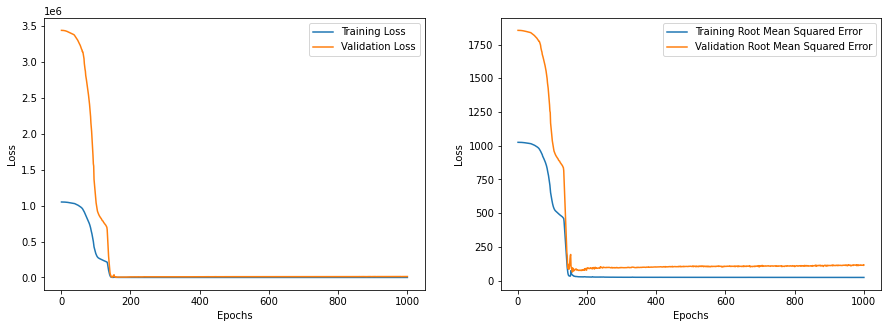

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code creates a figure with two subplots and plots the training and validation loss, as well as the training and validation root mean squared error (RMSE) values over the epochs. In the first line, two subplots are created. The `fig` variable represents the overall figure, while `ax1` and `ax2` represent the two subplots within the figure. #Set the height and width of the figure with the methods set_figheight() and set_figwidth(). These lines adjust the size of the figure to ensure proper visualization. Following that are the lines of code that plot the training and validation losses (`ax1`). In this example, the plot() function is called on `ax1` with `epochs` as the x-axis values and `loss` and `val_loss` as the y-axis values. The `label` argument specifies the labels for each line. The `set()` method is then called on `ax1` to set the x-axis and y-axis labels. Next, the training and validation root mean squared errors (RMSE) are plotted. As with the previous lines, the plot() function is called with `epochs` as the x-axis values and `root_mean_squared_error` and `val_root_mean_squared_error` as the y-axis values. The `set()` method is used to set the x-axis and y-axis labels.

The `legend()` method is called on both subplots to display a legend indicating the labels of the plotted lines.

Finally, the `plt.show()` function is called to display the figure with the plotted subplots.

By executing this code, two subplots are created within a figure, and the training and validation loss, as well as the training and validation RMSE values, are plotted over the epochs. A comparison of the model's performance and convergence of the loss and RMSE values during training can be made using this visualization.

Predicting Google's closing stock price

In [44]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)

This code uses the trained `GOOG_Model` to make predictions on the testing dataset `GOOG_Test_X`.

The `predict()` method is called on the `GOOG_Model` object, and the input features `GOOG_Test_X` are provided as the argument. This code generates predictions for the testing data using the trained model. When executed, the `GOOG_Model` predicts the target values for the input features in `GOOG_Test_X`. Predictions are stored in a variable called Google_prediction, which can be used for further analysis, evaluation, and visualization. Based on the patterns and relationships learned during training, these predictions represent the model's estimation of the target values.

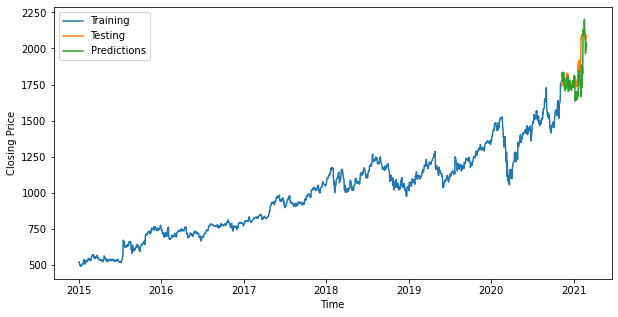

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'][GOOG['Date'] < '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] < '2020-11-07'], label = 'Training')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG['Adj. Close'][GOOG['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(GOOG['Date'][GOOG['Date'] >= '2020-11-07'], GOOG_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

To visualize the actual closing prices of GOOG, along with the predicted closing prices and the separation between training and testing periods, this code generates a plot. In the first line of code, we specify the figure's size using `plt.figure(figsize=(10, 5))`. This determines the dimensions of the plot. Next, the closing prices are plotted. The `plot()` function is used multiple times with different subsets of the data to represent different periods:  - The first `plot()` function call represents the training period by plotting the dates and corresponding adjusted close prices where the dates are earlier than '2020-11-07'. - The second `plot()` function call represents the testing period by plotting the dates and adjusted close prices where the dates are greater than or equal to '2020-11-07'. - The third `plot()` function call represents the predicted prices during the testing period by plotting the dates and the predicted closing prices.  The `xlabel()` and `ylabel()` functions are used to label the x-axis as 'Time' and the y-axis as 'Closing Price', respectively.  Lastly, the `legend()` function is called to display a legend on the graph, indicating the labels for the different lines representing the training, testing, and predicted prices.  By executing this code, a plot is generated that shows the actual closing GOOG stock prices during training and testing periods, as well as predicted closing prices. A visual comparison of actual and predicted prices provides insight into the model's performance.

In [46]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 115.66296805524927
MAPE: 0.039782693356206676


This code calculates the root mean squared error (RMSE) and mean absolute percentage error (MAPE) between the predicted closing prices (`GOOG_prediction`) and the actual closing prices (`GOOG_Test_Y`) of the GOOG stock.

The first line of code calculates the RMSE by calling the `mean_squared_error()` function, which measures the average squared difference between the predicted and actual values. The `sqrt()` function from the `math` module is then used to compute the square root of the mean squared error, yielding the RMSE value. In the second line of code, the MAPE is calculated by computing the absolute difference between the predicted and actual values. It then calculates the mean of the absolute differences divided by the actual prices. This computes the average percentage difference between the predicted and actual prices. The third and fourth lines of code print the RMSE and MAPE values. The `f-string` formatting is used to include the values within the printed strings. The RMSE and MAPE values are computed and displayed, providing insights into the model's accuracy and performance. A RMSE represents the average magnitude of the prediction error, whereas a MAPE represents the average percentage difference between the predicted and actual price.

Intuit

In [47]:
MSFT.head()

Date   Open   High    Low  Close  Adj. Close      Volume
0  2015-01-02  46.66  47.42  46.54  46.76       41.44  27913900.0
1  2015-01-05  46.37  46.73  46.25  46.33       41.06  39673900.0
2  2015-01-06  46.38  46.75  45.54  45.65       40.46  36447900.0
3  2015-01-07  45.98  46.46  45.49  46.23       40.97  29114100.0
4  2015-01-08  46.75  47.75  46.72  47.59       42.18  29645200.0

This code displays the first few rows of the MSFT dataset, allowing us to inspect the data and understand its structure and contents. This is accomplished by calling the head() function on the MSFT dataset. The default number of rows displayed is usually five, but it can be modified by passing an argument to the `head()` function. This code displays the column names and their values in the initial rows of the dataset. Prior to performing further analysis or modeling, it is helpful to understand the structure and types of data contained in the dataset.

In [48]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


This code provides information about the MSFT dataset, such as the column names, the number of non-null values, and the data types of each column. It displays a summary of the dataset's metadata by calling the info() function. This summary includes the index information, the column names, the count of non-null values in each column, and the data types of the columns. The code's purpose is to gain a high-level understanding of the dataset. As a result, missing values can be identified, appropriate data types can be determined for each column, and insights can be gained into the overall quality and characteristics of the data. Data preprocessing, exploratory data analysis, and modeling require this information.

In [49]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

This code converts the data type of the "Date" column in the MSFT dataset to the datetime format.  By using the `pd.to_datetime()` function on the "Date" column of the MSFT dataset, the values in that column are transformed from their original data type (likely a string or object type) to the datetime data type provided by the pandas library.  The purpose of this code is to ensure that the "Date" column is treated as datetime data, which allows for convenient handling and manipulation of dates Time and date. Following the conversion, the "Date" column can be used for various time-based operations such as filtering, grouping, and time series analysis. When working with temporal data, this conversion enables the use of pandas' datetime functionality.

Split the Data into Training and Test set. The Training Period: 2015-01-02 - 2020-09-30 The Testing Period:  2020-10-01 - 2021-02-26

In [50]:
MSFT_Date = '2020-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

This code prepares the MSFT dataset for training and testing by splitting it into input and target variables based on a specified date.

The first line assigns the value '2020-10-01' to the variable `MSFT_Date`, which represents the date used to split the dataset into training and testing portions.

The second line calls the `Dataset()` function, passing the MSFT dataset and the `MSFT_Date` as arguments. This function performs the dataset splitting process. It divides the data into four sets: `MSFT_Train_X`, `MSFT_Train_Y`, `MSFT_Test_X`, and `MSFT_Test_Y`.   - `MSFT_Train_X` represents the input features (X) for the training data, which are derived from the MSFT dataset prior to the `MSFT_Date`. - `MSFT_Train_Y` represents the corresponding target variable (Y) for the training data. - `MSFT_Test_X` represents the input features for the testing data, which are derived from the MSFT dataset on or after the `MSFT_Date`. - `MSFT_Test_Y` represents the corresponding target variable for the testing data.  The purpose of this code is to partition the By dividing the MSFT dataset into training and testing sets based on the specified date, the dataset can be used for model training and evaluation. Machine learning models can be trained on the historical data and evaluated on the unobserved future data using the resulting sets.

Fitting the model

In [51]:
MSFT_Model = Model()

This code initializes a machine learning model for the MSFT dataset. This code creates an instance of the `Model` class, which represents a machine learning model. The specific architecture and configuration of the model are defined in the `Model` function, which is typically a custom function based on the requirements of the problem.

To train and predict, this code will instantiate a model object. Layers, activation functions, and parameters specific to the problem can be incorporated into the model. Using the available data, the model object can then be configured and trained.

In [52]:
MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In this code, the MSFT model is configured for the training process by specifying the optimizer, loss function, and evaluation metrics. By calling the compile() method, all of the necessary components are set up. 

Training algorithms are defined by the optimization algorithm argument. In this case, the Adam optimizer is chosen, which is a popular algorithm for gradient-based optimization. During training, the difference between predicted and actual values is determined by the loss function. In this case, the mean squared error (MSE) is chosen as the loss function. The metrics argument defines the metrics that will be computed and displayed during training. In this case, the root mean squared error (RMSE) is chosen as the evaluation metric. If this code is executed, the MSFT_Model will be configured with the appropriate optimizer, loss function, and evaluation metric. In training iterations, these settings guide the model's learning and assess its performance.

In [ ]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

This code trains the MSFT model using the training data and validates its performance on the testing data. An instruction is given to the MSFT_Model object, which instructs it to train using the input features MSFT_Train_X and target variables MSFT_Train_Y. The specified number of `epochs` determines the number of times the model will iterate over the training data.

During the training process, the model's performance is evaluated on the validation data provided as `validation_data`, which consists of the input features `MSFT_Test_X` and the corresponding target variables `MSFT_Test_Y`. This validation data allows the model to assess its generalization and performance on unseen data. An optional callbacks argument can be provided to provide additional functionality. In this case, the `callback` function is passed as a callback object, which can perform specific actions at various points during training, such as adjusting the learning rate or saving the best model weights.

By executing this code, the `MSFT_Model` is trained on the training data for the specified number of epochs, and its performance is monitored on the validation data. By learning patterns and relationships within the training data, the model can make predictions, and through the training process, the loss function is minimized. MSFT_hist contains the training history, including loss and metrics for each epoch, which can be analyzed and visualized.

In [54]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

This code extracts the training history metrics from the `MSFT_hist` object and assigns them to individual variables. It contains a dictionary containing the training history metrics for each epoch. The first line of the code assigns this dictionary to the variable `history_dict`.  Next, the code retrieves specific metrics from the `history_dict` dictionary and assigns them to separate variables: - The `loss` variable stores the training loss values for each epoch. - The `root_mean_squared_error` variable stores the training root mean squared error (RMSE) values for each epoch. - The `val_loss` variable stores the validation loss values for each epoch. - The `val_root_mean_squared_error` A variable called epochs stores the validation RMSE values for each epoch. The last line of code defines epochs as a range of integers from 1 to the length of the loss list plus 1. Training history metrics are plotted using this range as the x-axis.

By executing this code, the training history metrics are extracted and stored in separate variables, enabling further analysis, visualization, and interpretation of the model's performance during training and validation.

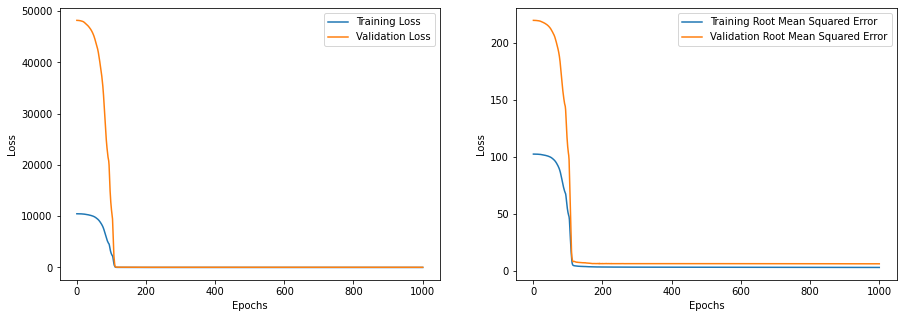

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

This code plots the training and validation loss, as well as the training and validation root mean squared error (RMSE), over the course of the training epochs.  The first line of code creates a figure object `fig` with two subplots (`ax1` and `ax2`) arranged side by side.  The next two lines set the dimensions of the figure using `set_figheight()` and `set_figwidth()` functions, adjusting the height to 5 units and the width to 15 units.  The subsequent lines plot the training and validation The loss on ax1 and the RMSE for training and validation on ax2. Line plots are created using the plot() function, with epochs serving as the x-axis values, and metrics (loss, val_loss, root_mean_squared_error, val_root_mean_squared_error) as the y-axis values. The `label` parameter is set to provide a label for each line.  Additional formatting is applied to each subplot using the `set()` function to set the x-axis label (`xlabel`), y-axis label (`ylabel`), and to customize the appearance of the plot.  The `legend()` function is called on each subplot to display a legend that identifies the plotted lines.  Finally, `plt.show()` is used to display the figure with the plotted metrics.  By executing this code, a figure with two subplots is shown, where Ax1 displays the training and validation loss curves, and ax2 displays the training and validation RMSE curves. When training and evaluating the model, this visual representation helps to understand its behavior and convergence.

Predicting Microsoft's closing stock price

In [56]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

This code uses the trained `MSFT_Model` to make predictions on the testing data `MSFT_Test_X`.

The `predict()` method is called on the `MSFT_Model` object, with `MSFT_Test_X` as the input data. The model takes the input data and generates predictions for the target variable. Based on the patterns and relationships it has learned throughout training, it uses this code to predict the target variable values for the testing data. MSFT_predictions store the results of the prediction algorithm, which can then be analyzed or used for evaluation.

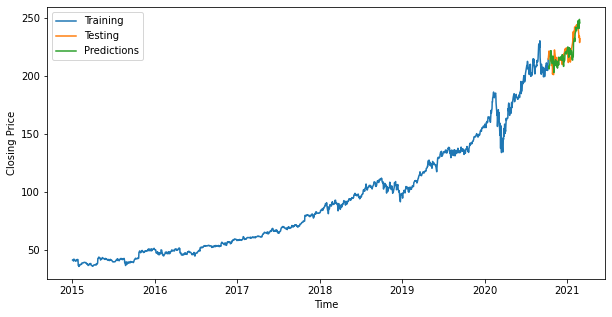

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'][MSFT['Date'] < '2020-10-12'], MSFT['Adj. Close'][MSFT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-09'], MSFT['Adj. Close'][MSFT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

This code generates a line plot to visualize the actual closing prices, training data, testing data, and predicted values of the Microsoft (MSFT) stock.  The `plt.figure(figsize=(10, 5))` line creates a new figure object with a specified width and height.  The subsequent lines use the `plt.plot()` function to create the line plot: - The first `plt.plot()` line plots the actual closing prices from the training period (`MSFT['Date'] < '2020-10-12'`) against the corresponding dates, labeling it as "Training". - The second `plt.plot()` line plots the actual closing prices from the testing period (`MSFT['Date'] >= '2020-10-09'`) against the corresponding dates, labeling it as "Testing". - The third `plt.plot()` line plots the predicted closing prices from the testing period (`MSFT_prediction.reshape(-1)`) against the corresponding dates, labeling it as "Predictions".  The `plt.xlabel()` and `plt.ylabel()` functions are used to set the x-axis and y-axis labels to "Time" and "Closing Price", This function adds a legend to the plot at the "best" location determined by the plot. Using this code, a line plot is generated that shows MSFT stock closing prices, training data, testing data, and predictions over time. Comparing the predicted values with the actual data allows evaluating how well the model captures the underlying patterns in stock prices.

In [58]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.2306768444560205
MAPE: 0.02214984775145576


This code calculates two evaluation metrics, root mean squared error (RMSE) and mean absolute percentage error (MAPE), to assess the performance of the predictions made by the `MSFT_Model` on the testing data.

The first line calculates the RMSE by comparing the predicted values (`MSFT_prediction`) with the actual values of the testing data (`MSFT_Test_Y.reshape(-1, 5)`) using the `mean_squared_error()` function from the `sklearn.metrics` module. The calculated mean squared error is then passed to the `math.sqrt()` function to obtain the RMSE.

As the second line shows, the MAPE is calculated by subtracting the predicted values from the actual values, taking the absolute values of the differences, dividing them by the absolute values of the actual values, and then calculating their means. This function displays the MAPE and RMSE calculated. The `f-string` syntax is employed to include the values of `rmse` and `mape` within the printed string. This code computes and prints the RMSE and MAPE values, providing insights into the performance of the `MSFT_Model`. Better predictive performance is indicated by lower RMSE and MAPE values.